In [1]:
cd /tf/astromer

/tf/astromer


In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sys,os
from core.data import pretraining_records
from core.input import input_format
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
dataset = pretraining_records('./data/records/macho2/train', 128, max_obs=50)

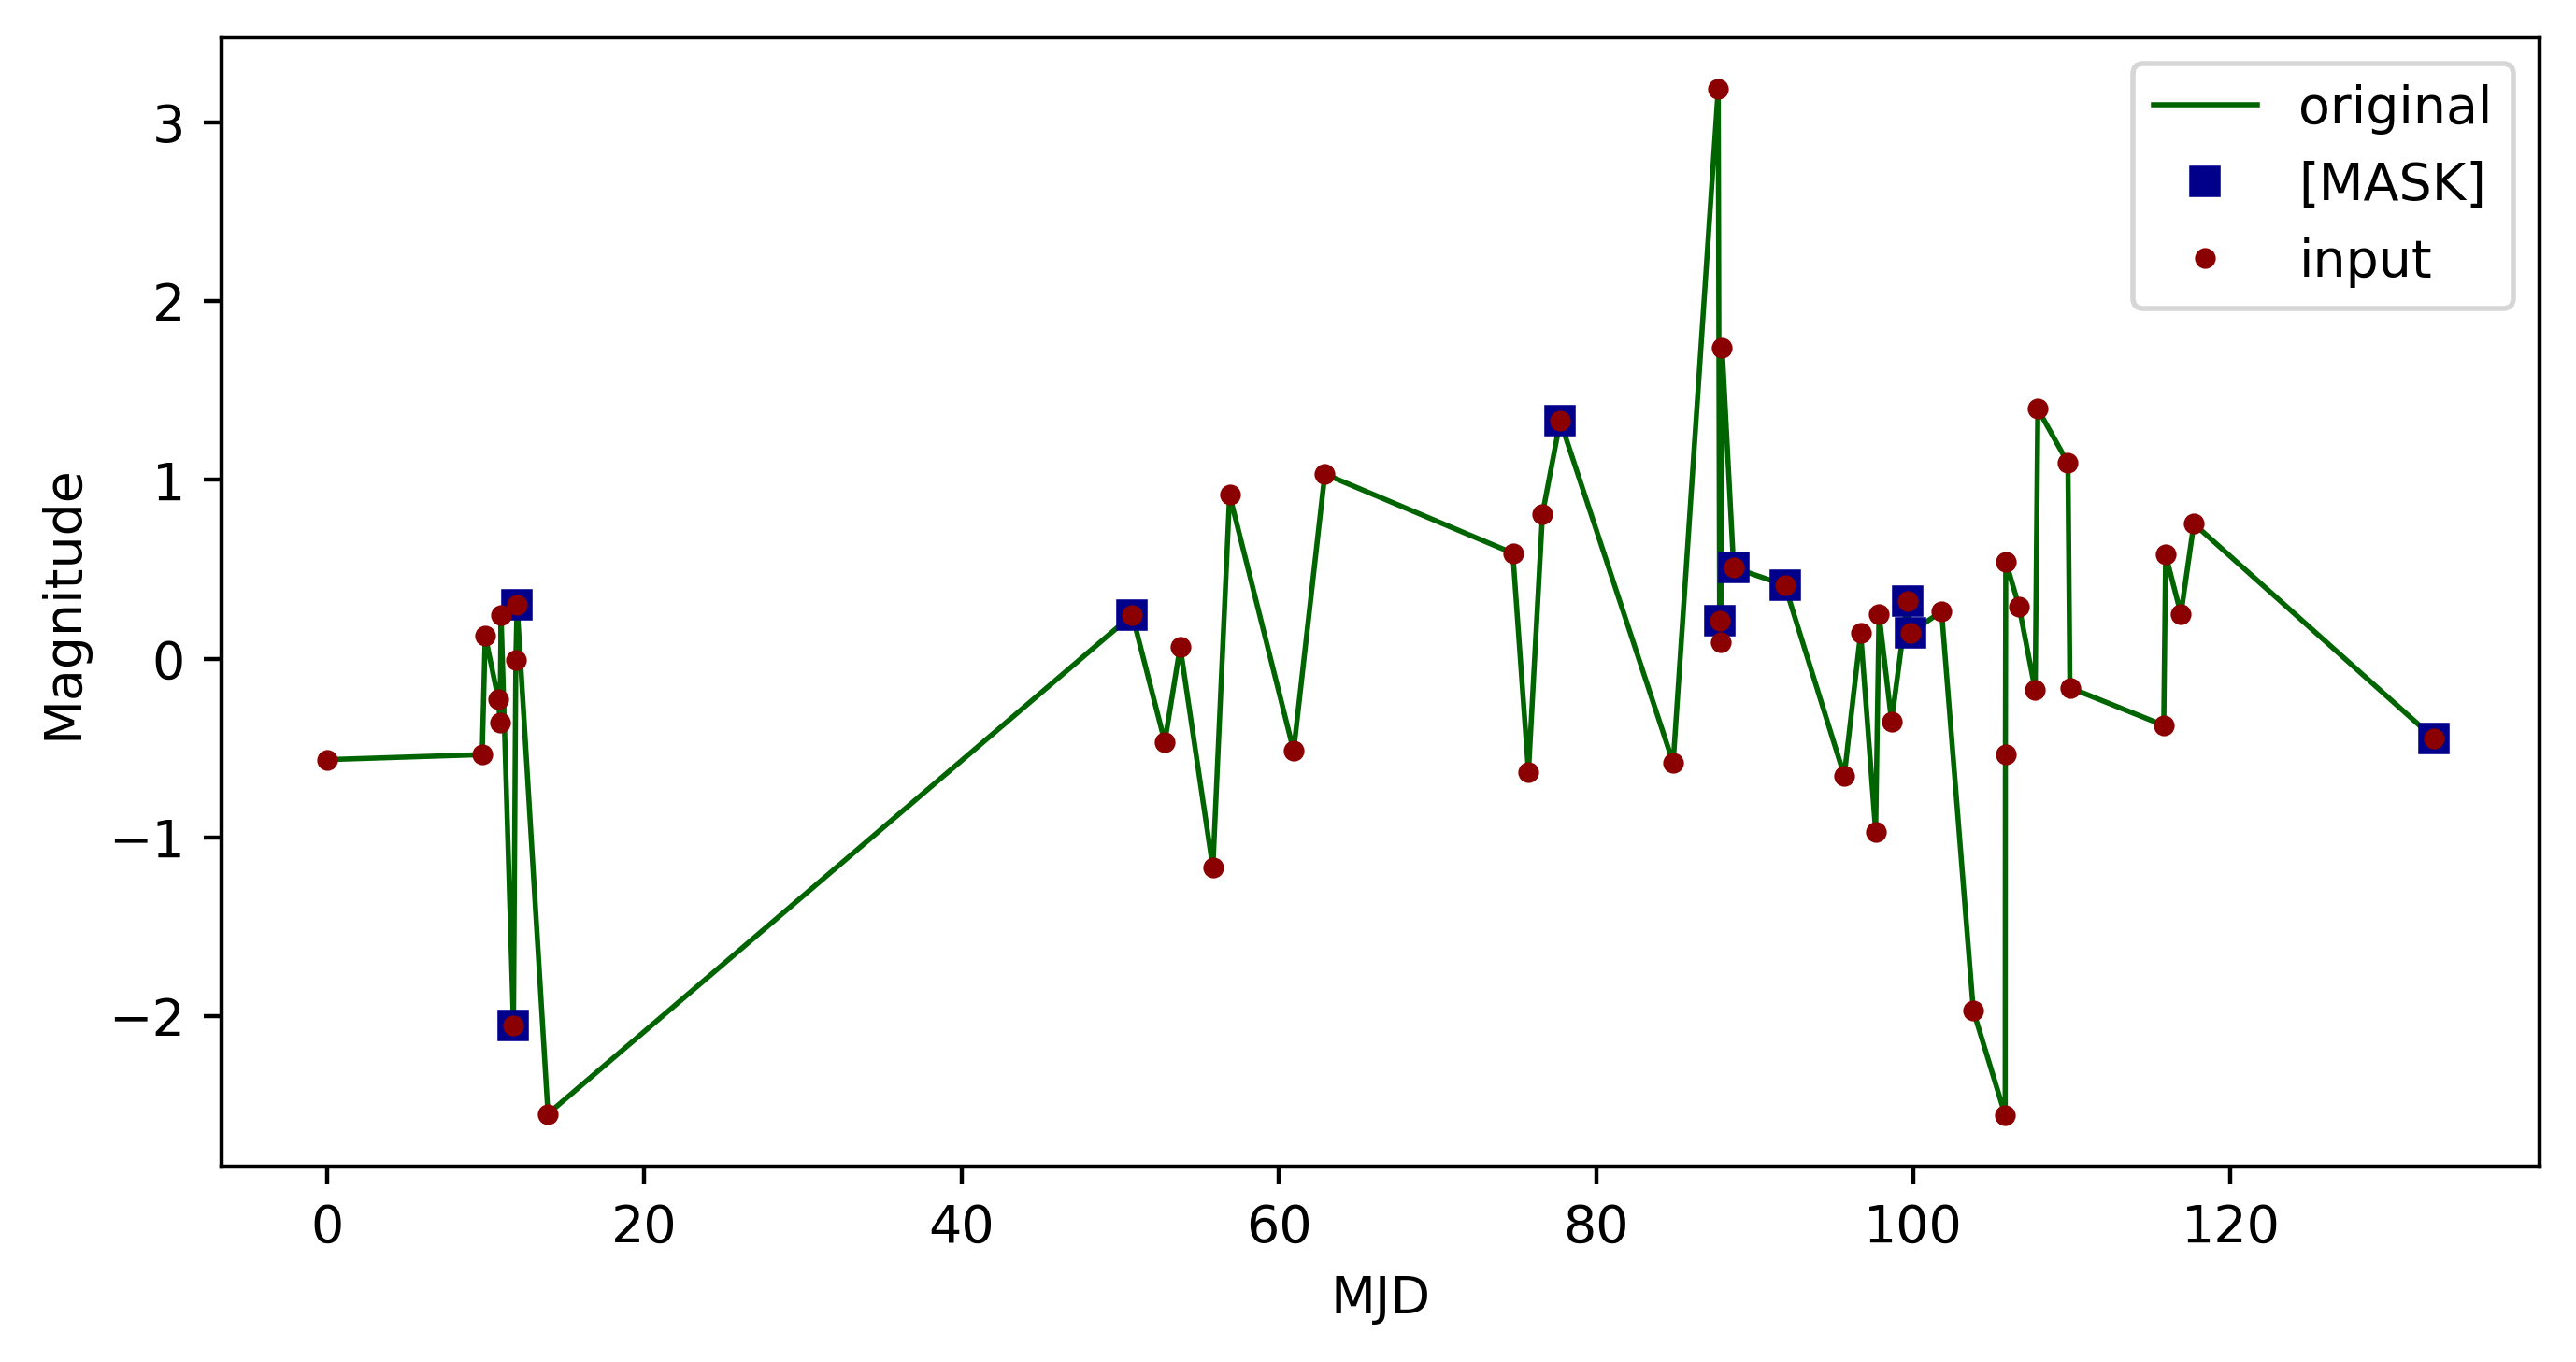

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(8,4), sharex=True, sharey=True, 
                         gridspec_kw={'hspace': 0.3, 'wspace': 0.2}, dpi=400)
for batch in dataset:
    xx, tt, mm = input_format(batch)
    
    x_sample = batch['input'][-1]
    o_sample = batch['original'][-1]
    t_sample = batch['times'][-1]
    m_sample = tf.squeeze(batch['mask'][-1])


    times = tf.boolean_mask(t_sample, m_sample)
    serie = tf.boolean_mask(x_sample, m_sample)
        
    
    axes.plot(t_sample, o_sample, color='darkgreen', label='original', linewidth=1)
    axes.plot(times, serie, color='darkblue', marker='s', markersize=5, linestyle='', label='[MASK]')
    axes.plot(t_sample, x_sample, color='darkred', label='input',  marker='.', linestyle='')    
    axes.set_xlabel('MJD')
    axes.set_ylabel('Magnitude')    
    axes.legend(bbox_to_anchor=(1, 1), ncol=1)
    break